Calculation of havoc rover without equipped echoes with emerald of genesis r1

In [18]:
import artefakty as art
import numpy as np
import random
import matplotlib
import matplotlib.pyplot as plt



350.0
iter  0 done
iter  1 done
iter  2 done
iter  3 done
iter  4 done
iter  5 done
iter  6 done
iter  7 done
iter  8 done
iter  9 done
522460.28725929646


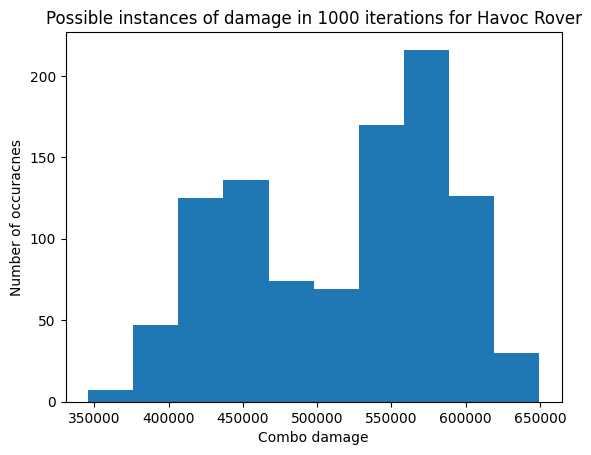

In [19]:
Rover_Havoc=art.Character(art.set_sse,10825,413,1259,125,5,150,art.weapon_emerald_of_genesis,'Havoc Rover',art.main_ha_dmg,0,12,12)
Rover_Havoc._apply_weapon_conditional_bonuses()
#Rover_Havoc.print_character_stats()
echo_lst=[]


n_weeks=50
list_of_days=np.ones(n_weeks)*7
print(sum(list_of_days))
#print(list_of_days)
damages_through_days=[]
average_damages_through_days=np.zeros(n_weeks)
damage_at_day=0
acc=0




for k in range(10):
    Rover_Havoc=art.Character(art.set_sse,10825,413,1259,125,5,150,art.weapon_emerald_of_genesis,'Havoc Rover',art.main_ha_dmg,0,12,12)
    Rover_Havoc._apply_weapon_conditional_bonuses()
    echo_lst=[]
    for i in list_of_days:
        echo_lst=echo_lst+art.simulate_rolling_echoes_n_days(int(i),False,[art.set_sse,art.set_mc],art.set_sse)
        inv=art.Inventory(art.desired_mainstats_list_havoc_dps,art.set_sse)
        damage_at_day+=inv.pick_best_echoes(echo_lst,Rover_Havoc,art.calculate_rover_combo_damage)
        damages_through_days.append(damage_at_day)
        damage_at_day=0
    average_damages_through_days+=np.array(damages_through_days)
    damages_through_days=[]
    print('iter ',k,'done')
average_damages_through_days=average_damages_through_days/10




501765.8670433694


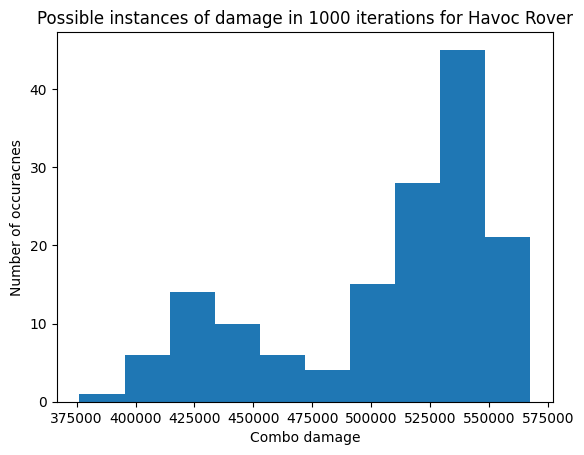

In [39]:

Rover_Havoc=art.Character(art.set_sse,10825,413,1259,125,5,150,art.weapon_emerald_of_genesis,'Havoc Rover',art.main_ha_dmg,0,12,12)
Rover_Havoc._apply_weapon_conditional_bonuses()
#Rover_Havoc.print_character_stats()
echo_lst=art.simulate_rolling_echoes_n_days(10,False,[art.set_sse,art.set_mc],art.set_sse)


inv=art.Inventory(art.desired_mainstats_list_havoc_dps,art.set_sse)
final_damage=inv.pick_best_echoes(echo_lst,Rover_Havoc,art.calculate_rover_combo_damage)

damage=[]
for i in range(150):
    damage.append(art.calculate_rover_combo_damage(Rover_Havoc))

fig,ax=plt.subplots()
ax.hist(damage)
#ax.semilogx()

ax.set(title='Possible instances of damage in 1000 iterations for Havoc Rover',xlabel='Combo damage',ylabel='Number of occuracnes')
print(final_damage)

In [20]:
Rover_Havoc.print_character_stats()
#for i in Rover_Havoc._inventory:
#    i.print_stats()

for i in Rover_Havoc._equipped_echoes_cost1:
    i.print_stats()
for i in Rover_Havoc._equipped_echoes_cost3:
    i.print_stats()
Rover_Havoc._equipped_echoes_cost4[0].print_stats()

#for i in inv._equipped_echoes:
#    i.print_stats()

print(average_damages_through_days)

#np.savetxt('average_damages_through_days_50_weeks.csv',average_damages_through_days,delimiter=',')

Name:  Havoc Rover 
 Total hp:  17808.325 
 Total atk:  2281.0 
 Total def:  1447.562 
 Crit rate:  59.89999999999999 %
 Crit damage:  253.4 %
 Energy recharge:  132.0 %
 Elemental damage bonus:  112 %
 Healing bonus:  0 %
 Basic attack damage bonus:  8.6 %
 Heavy attack damage bonus:  20.2 %
 Ultimate damage bonus:  7.9 %
 Skill damage bonus:  7.9 %
 Weapon:  emerald_of_genesis 
 Weapon bonuses applied:  True 
 Echo bonus applied:  True 
 2pc set bonus applied:  True 
 5pc set bonus applied:  True
Name:  H05_a 
 Set:  HavocDMG_s 
 Cost:  1 
 Mainstats:  ([18, 2280], 'ATK%')
Substats: 
[470]   sub_HP 

[10.1]   sub_he_DMG 

[18.6]   sub_CD 

[8.6]   sub_ATK% 

[8.1]   sub_CR 

Name:  N13 
 Set:  HavocDMG_s 
 Cost:  1 
 Mainstats:  ([18, 2280], 'ATK%')
Substats: 
[8.6]   sub_ATK% 

[8.1]   sub_CR 

[40]   sub_ATK 

[430]   sub_HP 

[9.2]   sub_ER 

Name:  R55 
 Set:  HavocDMG_s 
 Cost:  3 
 Mainstats:  ([30, 100], 'HavocDMG')
Substats: 
[6.9]   sub_CR 

[7.9]   sub_ATK% 

[430]   sub_HP

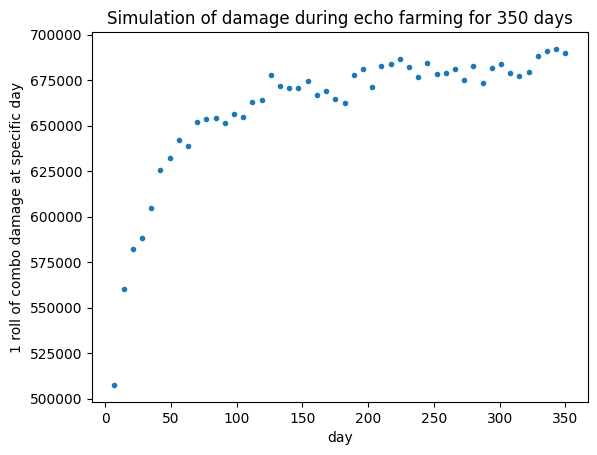

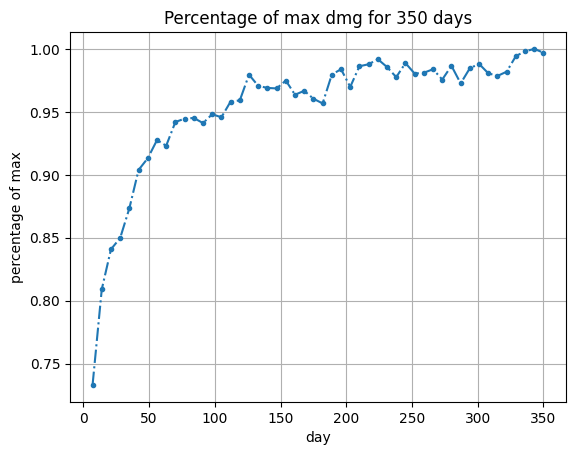

In [34]:
fig,ax=plt.subplots()
ax.plot(np.cumsum(list_of_days),average_damages_through_days,'.')
ax.set(title='Simulation of damage during echo farming for 350 days',xlabel='day',ylabel='1 roll of combo damage at specific day')


percentages_of_max=[i/max(average_damages_through_days) for i in average_damages_through_days]

fig,ax=plt.subplots()
ax.plot(np.cumsum(list_of_days),percentages_of_max,'-.',marker='.')
ax.set(title='Percentage of max dmg for 350 days',xlabel='day',ylabel='percentage of max')
ax.grid()
